In [1]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import random
import pickle
import time

In [2]:
from tensorflow.keras import datasets

In [3]:
import tensorflow as tf


In [4]:
from tensorflow.python.keras import datasets

In [5]:
pickle_in = open('ignore_folder/train_X.pickle', 'rb')
Xtrain = pickle.load(pickle_in)
pickle_in = open('ignore_folder/train_y.pickle', 'rb')
ytrain = pickle.load(pickle_in)

In [6]:
type(Xtrain)

numpy.ndarray

In [7]:
Xtrain.shape

(1965, 65, 79)

In [8]:
type(Xtrain[0])

numpy.ndarray

In [9]:
type(ytrain)

list

In [10]:
ytrain = np.asarray(ytrain)

In [11]:
type(ytrain)

numpy.ndarray

In [12]:
ytrain[:10]

array([6, 6, 4, 3, 7, 7, 3, 5, 5, 7])

In [13]:
Xtrain[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

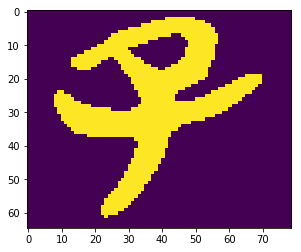

In [14]:
plt.imshow(Xtrain[0])

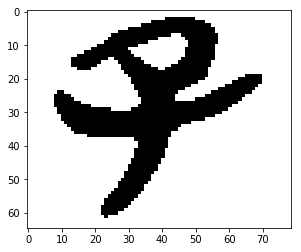

In [15]:
plt.imshow(Xtrain[0], cmap = plt.cm.binary)

In [16]:
Xtest = Xtrain[:100]

In [17]:
ytest = ytrain[:100]

In [18]:
len(Xtrain)

1965

In [19]:
len(Xtrain[:100])

100

In [20]:
len(Xtrain[:-100])

1865

In [21]:
len(Xtrain[0:-100])

1865

In [22]:
Xtrain = Xtrain[0:-100]

In [23]:
ytrain = ytrain[0:-100]

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=Xtrain[0].shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(8, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Name = "Chinese-Characters-NN-128x3-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

In [25]:
model.fit(Xtrain, ytrain, epochs=20, validation_split=0.3, callbacks=[tensorboard])

Train on 1305 samples, validate on 560 samples
Epoch 1/20
1305/1305 [==============================] - 1s 410us/step - loss: 8.2318 - acc: 0.4820 - val_loss: 7.0542 - val_acc: 0.5607
Epoch 2/20
1305/1305 [==============================] - 0s 245us/step - loss: 8.8977 - acc: 0.4460 - val_loss: 9.1528 - val_acc: 0.4321
Epoch 3/20
1305/1305 [==============================] - 0s 229us/step - loss: 9.1898 - acc: 0.4291 - val_loss: 9.0952 - val_acc: 0.4357
Epoch 4/20
1305/1305 [==============================] - 0s 229us/step - loss: 9.1203 - acc: 0.4337 - val_loss: 8.7210 - val_acc: 0.4589
Epoch 5/20
1305/1305 [==============================] - 0s 242us/step - loss: 9.0580 - acc: 0.4375 - val_loss: 8.6347 - val_acc: 0.4643
Epoch 6/20
1305/1305 [==============================] - 0s 230us/step - loss: 8.8433 - acc: 0.4513 - val_loss: 8.6946 - val_acc: 0.4589
Epoch 7/20
1305/1305 [==============================] - 0s 229us/step - loss: 8.8186 - acc: 0.4529 - val_loss: 8.6923 - val_acc: 0.4607
E

In [26]:
val_loss, val_acc = model.evaluate(Xtest, ytest)
print(val_loss, val_acc)

100/100 [==============================] - 0s 86us/step
9.832038116455077 0.39
